In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! rm -rf gan results tickets.csv

In [3]:
! unzip project.zip

Archive:  project.zip
  inflating: tickets.csv             
   creating: gan/
  inflating: gan/doppelganger.py     
  inflating: gan/load_data.py        
  inflating: gan/network.py          
  inflating: gan/op.py               
  inflating: gan/op.py.LICENSE       
  inflating: gan/output.py           
  inflating: gan/util.py             
 extracting: gan/__init__.py         
   creating: results/
   creating: results/checkpoint/
   creating: results/sample/


In [4]:
df = pd.read_csv("tickets.csv")

In [5]:
df.head()

,task_type,creation_date,view_date,action_date,customer_satisfaction,customer_problem_resolved,user_actioned,user_team
0,email,2021-01-02 02:49:00.000000000,2021-01-02 08:34:00.000000000,2021-01-02 08:53:00.000000000,5,True,13b968,green
1,email,2021-01-02 03:33:00.000000000,2021-01-02 08:59:00.000000000,2021-01-02 09:35:00.000000000,3,True,13b968,green
2,web_form,2021-01-02 08:43:00.000000000,2021-01-02 09:40:00.000000000,2021-01-02 10:05:00.000000000,3,True,13b968,green
3,web_form,2021-01-02 09:12:00.000000000,2021-01-02 10:11:00.000000000,2021-01-02 10:47:00.000000000,2,False,13b968,green
4,email,2021-01-02 10:21:00.000000000,2021-01-02 10:52:00.000000000,2021-01-02 11:26:00.000000000,5,True,13b968,green


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306419 entries, 0 to 306418
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   task_type                  306419 non-null  object
 1   creation_date              306419 non-null  object
 2   view_date                  306419 non-null  object
 3   action_date                306419 non-null  object
 4   customer_satisfaction      306419 non-null  int64 
 5   customer_problem_resolved  306419 non-null  bool  
 6   user_actioned              306419 non-null  object
 7   user_team                  306419 non-null  object
dtypes: bool(1), int64(1), object(6)
memory usage: 16.7+ MB


In [7]:
print("Num NaNs:")
df.isna().sum().sum()

Num NaNs:


0

In [8]:
print("Num unique task_type:")
task_type_dim = len(df["task_type"].value_counts())
task_type_dim

Num unique task_type:


3

In [9]:
print("Num unique customer_satisfaction:")
customer_satisfaction_dim = len(
    df["customer_satisfaction"].value_counts()
)
customer_satisfaction_dim

Num unique customer_satisfaction:


5

In [10]:
print("Num unique user_actioned:")
user_actioned_dim = len(df["user_actioned"].value_counts())
user_actioned_dim

Num unique user_actioned:


50

In [11]:
print("Num unique user_team:")
user_team_dim = len(df["user_team"].value_counts())
user_team_dim

Num unique user_team:


4

In [12]:
print("Num unique customer_problem_resolved:")
customer_problem_resolved_dim = len(df["customer_problem_resolved"].value_counts())
customer_problem_resolved_dim

Num unique customer_problem_resolved:


2

In [13]:
df["creation_date"] = pd.to_datetime(df["creation_date"])
df["view_date"] = pd.to_datetime(df["view_date"])
df["action_date"] = pd.to_datetime(df["action_date"])

In [14]:
df["view_date"] = (df.view_date - df.creation_date).dt.seconds

In [15]:
df["action_date"] = (df.action_date - df.creation_date).dt.seconds

In [16]:
df = pd.get_dummies(
    df,
    columns = [
        "customer_problem_resolved",
        "task_type",
        "customer_satisfaction",
        "user_team"
    ]
)
# df["customer_problem_resolved"].replace(
#     {False: 0, True: 1},
#     inplace = True
# )

In [17]:
df.head()

,creation_date,view_date,action_date,user_actioned,customer_problem_resolved_False,customer_problem_resolved_True,task_type_email,task_type_live_chat,task_type_web_form,customer_satisfaction_1,customer_satisfaction_2,customer_satisfaction_3,customer_satisfaction_4,customer_satisfaction_5,user_team_blue,user_team_green,user_team_orange,user_team_red
0,2021-01-02 02:49:00,20700,21840,13b968,0,1,1,0,0,0,0,0,0,1,0,1,0,0
1,2021-01-02 03:33:00,19560,21720,13b968,0,1,1,0,0,0,0,1,0,0,0,1,0,0
2,2021-01-02 08:43:00,3420,4920,13b968,0,1,0,0,1,0,0,1,0,0,0,1,0,0
3,2021-01-02 09:12:00,3540,5700,13b968,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,2021-01-02 10:21:00,1860,3900,13b968,0,1,1,0,0,0,0,0,0,1,0,1,0,0


In [18]:
from gan.output import Output, OutputType, Normalization

### Features

dif, view_date, action_date, customer_problem_resolved, task_type, customer_satisfaction,

### Attributes

user_team

In [19]:
view_date_dim = 1
action_date_dim = 1
dif_dim = 1

data_feature_outputs = [
    Output(
        type_ = OutputType.CONTINUOUS,
        dim = dif_dim,
        normalization = Normalization.ZERO_ONE,
        is_gen_flag = False
    ),
    Output(
        type_ = OutputType.CONTINUOUS,
        dim = view_date_dim,
        normalization = Normalization.ZERO_ONE,
        is_gen_flag = False
    ),
    Output(
        type_ = OutputType.CONTINUOUS,
        dim = action_date_dim,
        normalization = Normalization.ZERO_ONE,
        is_gen_flag = False
    ),
    Output(
        type_ = OutputType.DISCRETE,
        dim = customer_problem_resolved_dim,
        normalization = None,
        is_gen_flag = False
    ),
    Output(
        type_ = OutputType.DISCRETE,
        dim = task_type_dim,
        normalization = None,
        is_gen_flag = False
    ),
    Output(
        type_ = OutputType.DISCRETE,
        dim = customer_satisfaction_dim,
        normalization = None,
        is_gen_flag = False
    ),
]

In [20]:
data_attribute_outputs = [
    Output(
        type_ = OutputType.DISCRETE,
        dim = user_team_dim,
        normalization = None,
        is_gen_flag = False
    ),
]

In [21]:
# Used for setting Lmax
max(df.user_actioned.value_counts())

8526

In [22]:
num_training_samples = user_actioned_dim
Lmax = 8600   # > 8526
total_dim_features = view_date_dim + \
                     action_date_dim + \
                     task_type_dim + \
                     dif_dim + \
                     customer_satisfaction_dim + \
                     customer_problem_resolved_dim

data_feature = np.zeros(
    (num_training_samples, Lmax, total_dim_features),
    dtype = "float32"
)

total_dim_attributes = user_team_dim

data_attribute = np.zeros(
    (num_training_samples, total_dim_attributes),
    dtype = "float32"
)

data_gen_flag = np.zeros(
    (num_training_samples, Lmax),
    dtype = "float32"
)

In [23]:
feature_columns = []; attribute_columns = []

for col in df:
    if(
        col.startswith("task_type") or
        col.startswith("customer_satisfaction") or
        col.startswith("customer_problem_resolved") or
        col == "creation_date" or # dif
        col == "view_date" or
        col == "action_date"
      ):
        feature_columns.append(col)
    else:
        if(col != "user_actioned"):
            attribute_columns.append(col)

In [24]:
def minmax(mat, name):
    return (mat[name] - mat[name].min()) / (mat[name].max() - mat[name].min())

In [25]:
for i, user in enumerate(df.user_actioned.unique()):
    user_features = df[feature_columns][df.user_actioned == user]
    user_features = user_features.sort_values(by = ["creation_date"], ignore_index = True)
    user_features["creation_date"] = user_features.creation_date.diff(1).fillna(pd.Timedelta(seconds = 0)).dt.seconds
    user_features["creation_date"] = minmax(user_features, "creation_date")
    user_features["view_date"] = minmax(user_features, "view_date")
    user_features["action_date"] = minmax(user_features, "action_date")
    data_feature[i, :len(user_features), :] = np.asarray(user_features, dtype = "float32")

    user_attributes = df[attribute_columns][df.user_actioned == user].drop_duplicates()
    data_attribute[i, :] = np.asarray(user_attributes, dtype = "float32")

    data_gen_flag[i, :len(user_features)] = 1

In [26]:
print(f"data_feature Dimensions: {data_feature.shape}")
print(f"data_attribute Dimensions: {data_attribute.shape}")
print(f"data_gen_flag Dimensions: {data_gen_flag.shape}")

data_feature Dimensions: (50, 8600, 13)
data_attribute Dimensions: (50, 4)
data_gen_flag Dimensions: (50, 8600)


# DoppelGANger

In [27]:
! pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.4 MB/s eta 0:00:00


In [28]:
import sys
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from gan.load_data import load_data
from gan.network import DoppelGANgerGenerator, Discriminator, RNNInitialStateType, AttrDiscriminator
from gan.doppelganger import DoppelGANger
from gan import output
from gan.util import add_gen_flag, normalize_per_sample, renormalize_per_sample

Instructions for updating:
non-resource variables are not supported in the long term
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [29]:
g_attr_d_coe = 1.0
feature_num_layers = 4
feature_num_units = 400
attribute_num_layers = 2
attribute_num_units = 200
disc_num_layers = 5
disc_num_units = 200
sample_len = 50   # Num sequences for each user (Lmax)
initial_state = RNNInitialStateType.RANDOM

In [30]:
real_attribute_mask = [True] * len(data_attribute_outputs)

In [31]:
data_feature, data_feature_outputs = add_gen_flag(
    data_feature,
    data_gen_flag,
    data_feature_outputs,
    sample_len
)

In [32]:
generator = DoppelGANgerGenerator(
    feed_back = False,
    noise = True,
    feature_outputs = data_feature_outputs,
    attribute_outputs = data_attribute_outputs,
    real_attribute_mask = real_attribute_mask,
    sample_len = sample_len,
    feature_num_layers = feature_num_layers,
    feature_num_units = feature_num_units,
    attribute_num_layers = attribute_num_layers,
    attribute_num_units = attribute_num_units,
    initial_state = initial_state
)

In [33]:
discriminator = Discriminator(
    num_layers = disc_num_layers,
    num_units = disc_num_units
)

In [34]:
attr_discriminator = AttrDiscriminator(
    num_layers = disc_num_layers,
    num_units = disc_num_units
)

In [35]:
checkpoint_dir = "./results/checkpoint"
sample_dir = "./results/sample"
time_path = "./results/time.txt"
epoch = 400
batch_size = 25
vis_freq = 100
vis_num_sample = 10
d_gp_coe = 10.0
attr_d_gp_coe = 10.0
g_attr_d_coe = 1.0
d_rounds = 1
g_rounds = 1
g_lr = 0.001
d_lr = 0.001
attr_d_lr = 0.001
extra_checkpoint_freq = 100
epoch_checkpoint_freq = 100
num_packing = 1
total_generate_num_sample = 50

In [36]:
run_config = tf.ConfigProto()
with tf.Session(config = run_config) as sess:
    gan = DoppelGANger(
        sess = sess,
        checkpoint_dir = checkpoint_dir,
        sample_dir = sample_dir,
        time_path = time_path,
        epoch = epoch,
        batch_size = batch_size,
        data_feature = data_feature,
        data_attribute = data_attribute,
        real_attribute_mask = real_attribute_mask,
        data_gen_flag = data_gen_flag,
        sample_len = sample_len,
        data_feature_outputs = data_feature_outputs,
        data_attribute_outputs = data_attribute_outputs,
        vis_freq = vis_freq,
        vis_num_sample = vis_num_sample,
        generator = generator,
        discriminator = discriminator,
        attr_discriminator = attr_discriminator,
        d_gp_coe = d_gp_coe,
        attr_d_gp_coe = attr_d_gp_coe,
        g_attr_d_coe = g_attr_d_coe,
        d_rounds = d_rounds,
        g_rounds = g_rounds,
        g_lr = g_lr,
        d_lr = d_lr,
        attr_d_lr = attr_d_lr,
        extra_checkpoint_freq = extra_checkpoint_freq,
        epoch_checkpoint_freq = epoch_checkpoint_freq,
        num_packing = num_packing
    )

    gan.build()
    gan.train()

    if data_feature.shape[1] % sample_len != 0:
        raise Exception("length must be a multiple of sample_len")

    length = int(data_feature.shape[1] / sample_len)
    real_attribute_input_noise = gan.gen_attribute_input_noise(
        total_generate_num_sample
    )
    addi_attribute_input_noise = gan.gen_attribute_input_noise(
        total_generate_num_sample
    )
    feature_input_noise = gan.gen_feature_input_noise(
        total_generate_num_sample, length
    )
    input_data = gan.gen_feature_input_data_free(
        total_generate_num_sample
    )

    features, attributes, gen_flags, lengths = gan.sample_from(
        real_attribute_input_noise,
        addi_attribute_input_noise,
        feature_input_noise,
        input_data
    )

/content/gan/op.py:11: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  output = tf.compat.v1.layers.dense(
Instructions for updating:
Colocations handled automatically by placer.
/content/gan/network.py:297: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Layers of DoppelGANgerGenerator
[<tf.Variable 'DoppelGANgerGenerator/attribute_real/layer0/linear/dense/kernel:0' shape=(5, 200) dtype=float32_ref>, <tf.Variable 'DoppelGANgerGenerator/attribute_real/layer0/linear/dense/bias:0' shape=(200,) dtype=float32_ref>, <tf.Variable 'DoppelGANgerGenerator/attribute_real/layer0/batch_norm_1/gamma:0' shape=(200,) dtype=float32>, <tf.Variable 'DoppelGANgerGenerator/attribute_real/layer0/batch_norm_1/beta:0' shape=(200,) dtype=float32>, <tf.Variable 'DoppelGANgerGenerator/attribute_real/layer0/batch_norm_1/moving_mean:0' shape=(200,) dtype=float32>, <tf.Variable 'DoppelGANgerGenerator/attribute_real/layer0/batch_norm_1/moving_variance:0' shape=(200,) dtype=float32>, <tf.Variable 'DoppelGANgerGenerator/attribute_real/layer1/output0/linear/dense/kernel:0' shape=(200, 4) dtype=float32_ref>, <tf.Variable 'DoppelGANgerGenerator/attribute_real/layer1/output0/linear/dense/bias:0' shape=(4,) dtype=float32_ref>, <tf.Variable 'DoppelGANgerGenerator/feature/mu

100%|██████████| 400/400 [3:15:48<00:00, 29.37s/it]


In [37]:
print(features.shape)
print(attributes.shape)
print(gen_flags.shape)

(50, 8600, 13)
(50, 4)
(50, 8600)


In [38]:
features_df = pd.DataFrame(columns = feature_columns)
for seq in features:
    features_df = pd.concat(
        [ features_df, pd.DataFrame(seq, columns = features_df.columns) ],
        ignore_index = True
    )

In [39]:
features_df

,creation_date,view_date,action_date,customer_problem_resolved_False,customer_problem_resolved_True,task_type_email,task_type_live_chat,task_type_web_form,customer_satisfaction_1,customer_satisfaction_2,customer_satisfaction_3,customer_satisfaction_4,customer_satisfaction_5
0,0.109837,0.227151,0.314757,0.748999,0.251001,0.332969,0.322423,0.344608,0.236024,0.188685,0.182804,0.154430,0.238056
1,0.136474,0.444951,0.356925,0.453172,0.546828,0.617017,0.256249,0.126735,0.403357,0.119611,0.141655,0.234709,0.100669
2,0.085735,0.384625,0.298200,0.533071,0.466929,0.333800,0.493378,0.172822,0.222493,0.248693,0.279445,0.114715,0.134655
3,0.129714,0.260345,0.259623,0.755670,0.244330,0.484188,0.144008,0.371804,0.556090,0.156717,0.069152,0.075545,0.142497
4,0.130215,0.274974,0.273323,0.776609,0.223391,0.484086,0.253772,0.262141,0.481240,0.069114,0.293904,0.064666,0.091076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429995,0.060467,0.280855,0.172506,0.039467,0.960533,0.275432,0.509295,0.215273,0.181256,0.628259,0.157101,0.028346,0.005037
429996,0.079019,0.143892,0.168209,0.612609,0.387391,0.154119,0.576266,0.269615,0.354865,0.123156,0.336503,0.102008,0.083469
429997,0.058662,0.132637,0.138176,0.143994,0.856006,0.398981,0.489244,0.111776,0.267121,0.164321,0.124649,0.072765,0.371143
429998,0.058170,0.155172,0.136137,0.175913,0.824087,0.536696,0.397758,0.065546,0.142965,0.073264,0.087576,0.100624,0.595571


In [40]:
features_no_zero_df = features_df[(features_df != 0).any(axis = 1)].reset_index(drop = True)
features_no_zero_df

,creation_date,view_date,action_date,customer_problem_resolved_False,customer_problem_resolved_True,task_type_email,task_type_live_chat,task_type_web_form,customer_satisfaction_1,customer_satisfaction_2,customer_satisfaction_3,customer_satisfaction_4,customer_satisfaction_5
0,0.109837,0.227151,0.314757,0.748999,0.251001,0.332969,0.322423,0.344608,0.236024,0.188685,0.182804,0.154430,0.238056
1,0.136474,0.444951,0.356925,0.453172,0.546828,0.617017,0.256249,0.126735,0.403357,0.119611,0.141655,0.234709,0.100669
2,0.085735,0.384625,0.298200,0.533071,0.466929,0.333800,0.493378,0.172822,0.222493,0.248693,0.279445,0.114715,0.134655
3,0.129714,0.260345,0.259623,0.755670,0.244330,0.484188,0.144008,0.371804,0.556090,0.156717,0.069152,0.075545,0.142497
4,0.130215,0.274974,0.273323,0.776609,0.223391,0.484086,0.253772,0.262141,0.481240,0.069114,0.293904,0.064666,0.091076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266745,0.060467,0.280855,0.172506,0.039467,0.960533,0.275432,0.509295,0.215273,0.181256,0.628259,0.157101,0.028346,0.005037
266746,0.079019,0.143892,0.168209,0.612609,0.387391,0.154119,0.576266,0.269615,0.354865,0.123156,0.336503,0.102008,0.083469
266747,0.058662,0.132637,0.138176,0.143994,0.856006,0.398981,0.489244,0.111776,0.267121,0.164321,0.124649,0.072765,0.371143
266748,0.058170,0.155172,0.136137,0.175913,0.824087,0.536696,0.397758,0.065546,0.142965,0.073264,0.087576,0.100624,0.595571


In [41]:
creation_dates = df.sort_values(["creation_date"]).creation_date
creation_dates = creation_dates.diff(1).fillna(pd.Timedelta(seconds = 0)).dt.seconds
creation_dates = (creation_dates - creation_dates.min()) / (creation_dates.max() - creation_dates.min())
creation_dates

61311     0.000000
277713    0.026316
102190    0.026316
295559    0.026316
289900    0.000000
            ...   
289895    0.117105
228610    0.078509
48771     0.074561
12161     0.057456
295552    0.642982
Name: creation_date, Length: 306419, dtype: float64

In [42]:
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import jensenshannon

num_sample_plot = 5000

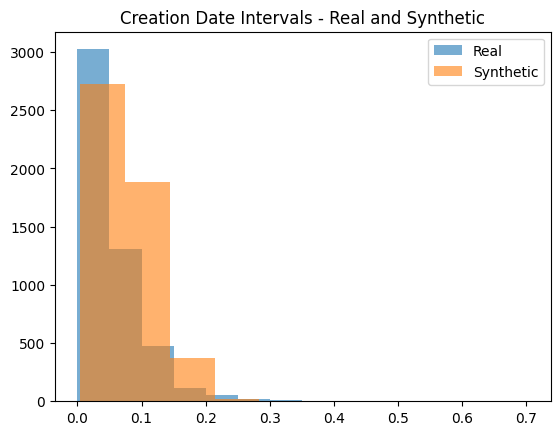

In [43]:
%matplotlib inline

reals = creation_dates.sample(num_sample_plot)
synthetics = features_no_zero_df["creation_date"].sample(num_sample_plot)

plt.hist(
    reals,
    alpha = 0.6,
    label = "Real"
)
plt.hist(
    synthetics,
    alpha = 0.6,
    label = "Synthetic"
)
plt.legend(loc = "upper right")
plt.title("Creation Date Intervals - Real and Synthetic")
plt.show()

In [44]:
wasserstein_distance(reals, synthetics)

0.03290753397477987

In [45]:
view_dates = (df.view_date - df.view_date.min()) / (df.view_date.max() - df.view_date.min())
action_dates = (df.action_date - df.action_date.min()) / (df.action_date.max() - df.action_date.min())

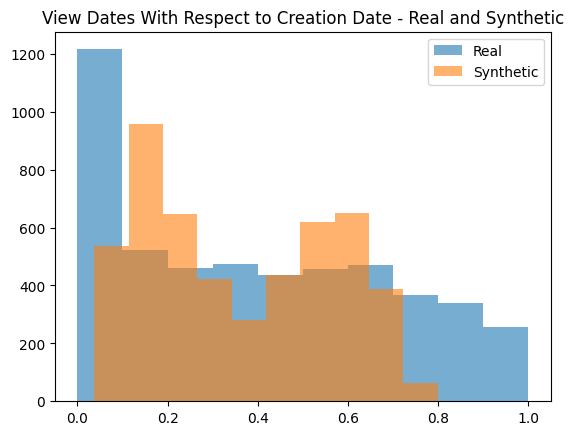

In [46]:
%matplotlib inline

reals = view_dates.sample(num_sample_plot)
synthetics = features_no_zero_df["view_date"].sample(num_sample_plot)

plt.hist(
    reals,
    alpha = 0.6,
    label = "Real"
)
plt.hist(
    synthetics,
    alpha = 0.6,
    label = "Synthetic"
)
plt.legend(loc = "upper right")
plt.title("View Dates With Respect to Creation Date - Real and Synthetic")
plt.show()

In [47]:
wasserstein_distance(reals, synthetics)

0.08178000682131485

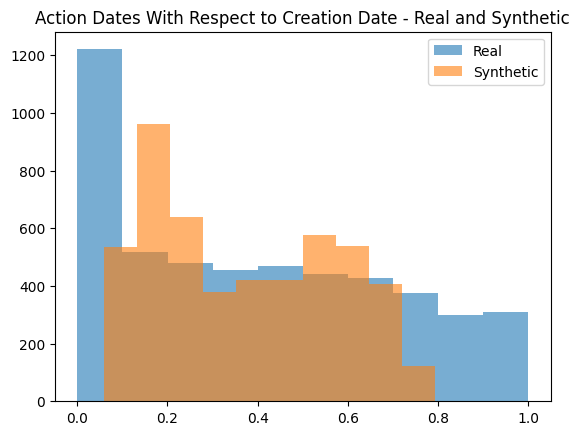

In [48]:
%matplotlib inline

reals = action_dates.sample(num_sample_plot)
synthetics = features_no_zero_df["action_date"].sample(num_sample_plot)

plt.hist(
    reals,
    alpha = 0.6,
    label = "Real"
)
plt.hist(
    synthetics,
    alpha = 0.6,
    label = "Synthetic"
)
plt.legend(loc = "upper right")
plt.title("Action Dates With Respect to Creation Date - Real and Synthetic")
plt.show()

In [49]:
wasserstein_distance(reals, synthetics)

0.08377117957456179

In [63]:
filter_cols = [col for col in df if col.startswith("customer_problem_resolved")]
max_cols = features_no_zero_df[filter_cols].idxmax(axis = 1).items()

features_no_zero_df[filter_cols] = 0
for row, col in max_cols:
  features_no_zero_df.loc[row, col] = 1

Synthetics -- idx: (0, 1), val: 3629
Synthetics -- idx: (1, 0), val: 1371
Reals -- idx: (0, 1), val: 2987
Reals -- idx: (1, 0), val: 2013


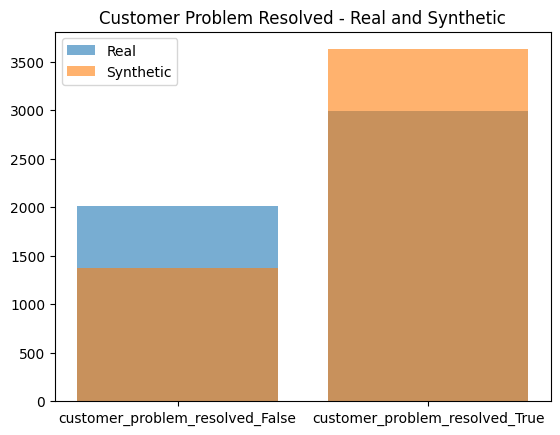

In [64]:
%matplotlib inline

synthetics = [-1] * len(filter_cols)
for idx, val in features_no_zero_df[filter_cols].sample(num_sample_plot).value_counts().items():
    print(f"Synthetics -- idx: {idx}, val: {val}")
    synthetics[idx.index(max(idx))] = val

reals = [-1] * len(filter_cols)
for idx, val in df[filter_cols].sample(num_sample_plot).value_counts().items():
    print(f"Reals -- idx: {idx}, val: {val}")
    reals[idx.index(max(idx))] = val

plt.bar(
    filter_cols,
    reals,
    alpha = 0.6,
    label = "Real"
)
plt.bar(
    filter_cols,
    synthetics,
    alpha = 0.6,
    label = "Synthetic"
)
plt.legend(loc = "upper left")
plt.title("Customer Problem Resolved - Real and Synthetic")
plt.show()

In [65]:
jensenshannon(
    df[filter_cols].sample(num_sample_plot),
    features_no_zero_df[filter_cols].sample(num_sample_plot)
)

array([0.6844402 , 0.48761415])

In [66]:
filter_cols = [col for col in df if col.startswith("task_type")]
max_cols = features_no_zero_df[filter_cols].idxmax(axis = 1).items()

features_no_zero_df[filter_cols] = 0
for row, col in max_cols:
  features_no_zero_df.loc[row, col] = 1

Synthetics -- idx: (1, 0, 0), val: 2592
Synthetics -- idx: (0, 0, 1), val: 1862
Synthetics -- idx: (0, 1, 0), val: 546
Reals -- idx: (1, 0, 0), val: 2273
Reals -- idx: (0, 0, 1), val: 2215
Reals -- idx: (0, 1, 0), val: 512


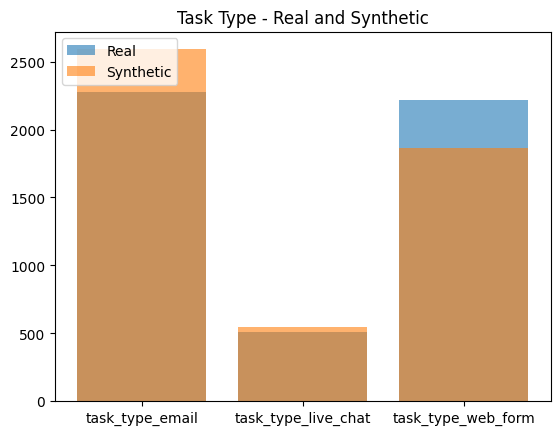

In [67]:
%matplotlib inline

synthetics = [-1] * len(filter_cols)
for idx, val in features_no_zero_df[filter_cols].sample(num_sample_plot).value_counts().items():
    print(f"Synthetics -- idx: {idx}, val: {val}")
    synthetics[idx.index(max(idx))] = val

reals = [-1] * len(filter_cols)
for idx, val in df[filter_cols].sample(num_sample_plot).value_counts().items():
    print(f"Reals -- idx: {idx}, val: {val}")
    reals[idx.index(max(idx))] = val

plt.bar(
    filter_cols,
    reals,
    alpha = 0.6,
    label = "Real"
)
plt.bar(
    filter_cols,
    synthetics,
    alpha = 0.6,
    label = "Synthetic"
)
plt.legend(loc = "upper left")
plt.title("Task Type - Real and Synthetic")
plt.show()

In [68]:
jensenshannon(
    df[filter_cols].sample(num_sample_plot),
    features_no_zero_df[filter_cols].sample(num_sample_plot)
)

array([0.60541435, 0.78557681, 0.63463092])

In [69]:
filter_cols = [col for col in df if col.startswith("customer_satisfaction")]
max_cols = features_no_zero_df[filter_cols].idxmax(axis = 1).items()

features_no_zero_df[filter_cols] = 0
for row, col in max_cols:
  features_no_zero_df.loc[row, col] = 1

Synthetics -- idx: (0, 0, 0, 0, 1), val: 2848
Synthetics -- idx: (1, 0, 0, 0, 0), val: 1522
Synthetics -- idx: (0, 0, 1, 0, 0), val: 212
Synthetics -- idx: (0, 1, 0, 0, 0), val: 210
Synthetics -- idx: (0, 0, 0, 1, 0), val: 208
Reals -- idx: (0, 0, 0, 0, 1), val: 1647
Reals -- idx: (1, 0, 0, 0, 0), val: 1443
Reals -- idx: (0, 0, 1, 0, 0), val: 690
Reals -- idx: (0, 1, 0, 0, 0), val: 620
Reals -- idx: (0, 0, 0, 1, 0), val: 600


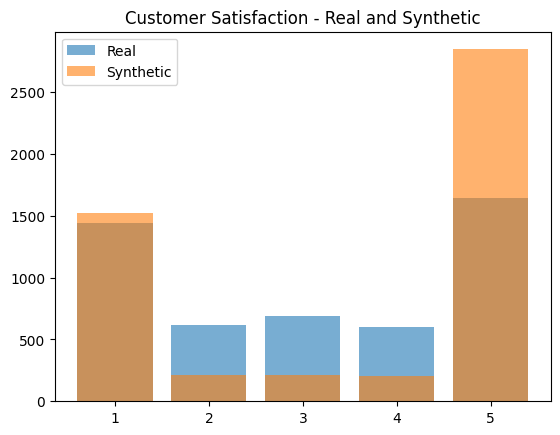

In [70]:
%matplotlib inline

synthetics = [-1] * len(filter_cols)
for idx, val in features_no_zero_df[filter_cols].sample(num_sample_plot).value_counts().items():
    print(f"Synthetics -- idx: {idx}, val: {val}")
    synthetics[idx.index(max(idx))] = val

reals = [-1] * len(filter_cols)
for idx, val in df[filter_cols].sample(num_sample_plot).value_counts().items():
    print(f"Reals -- idx: {idx}, val: {val}")
    reals[idx.index(max(idx))] = val

plt.bar(
    [col.split("_")[-1] for col in filter_cols],
    reals,
    alpha = 0.6,
    label = "Real"
)
plt.bar(
    [col.split("_")[-1] for col in filter_cols],
    synthetics,
    alpha = 0.6,
    label = "Synthetic"
)
plt.legend(loc = "upper left")
plt.title("Customer Satisfaction - Real and Synthetic")
plt.show()

In [71]:
jensenshannon(
    df[filter_cols].sample(num_sample_plot),
    features_no_zero_df[filter_cols].sample(num_sample_plot)
)

array([0.70077934, 0.79931987, 0.8027167 , 0.80737119, 0.62503361])

In [72]:
attributes_df = pd.DataFrame(attributes, columns = attribute_columns)
attributes_df.head()

,user_team_blue,user_team_green,user_team_orange,user_team_red
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [73]:
filter_cols = [col for col in df if col.startswith("user_team")]
max_cols = attributes_df.idxmax(axis = 1).items()

attributes_df[:] = 0
for row, col in max_cols:
  attributes_df.loc[row, col] = 1

Synthetics -- idx: (0.0, 1.0, 0.0, 0.0), val: 18
Synthetics -- idx: (1.0, 0.0, 0.0, 0.0), val: 17
Synthetics -- idx: (0.0, 0.0, 0.0, 1.0), val: 10
Synthetics -- idx: (0.0, 0.0, 1.0, 0.0), val: 5
Reals -- idx: (0.0, 1.0, 0.0, 0.0), val: 15
Reals -- idx: (0.0, 0.0, 0.0, 1.0), val: 12
Reals -- idx: (1.0, 0.0, 0.0, 0.0), val: 12
Reals -- idx: (0.0, 0.0, 1.0, 0.0), val: 11


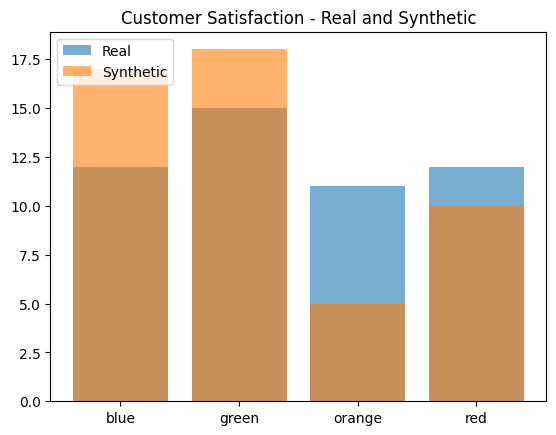

In [74]:
%matplotlib inline

synthetics = [-1] * len(attributes_df.columns)
for idx, val in attributes_df.value_counts().items():
    print(f"Synthetics -- idx: {idx}, val: {val}")
    synthetics[idx.index(max(idx))] = val

real_attr_df = pd.DataFrame(data_attribute, columns = filter_cols)
reals = [-1] * len(attributes_df.columns)
for idx, val in real_attr_df.value_counts().items():
    print(f"Reals -- idx: {idx}, val: {val}")
    reals[idx.index(max(idx))] = val

plt.bar(
    [col.split("_")[-1] for col in filter_cols],
    reals,
    alpha = 0.6,
    label = "Real"
)
plt.bar(
    [col.split("_")[-1] for col in filter_cols],
    synthetics,
    alpha = 0.6,
    label = "Synthetic"
)
plt.legend(loc = "upper left")
plt.title("User Team - Real and Synthetic")
plt.show()

In [75]:
jensenshannon(
    attributes_df,
    real_attr_df
)

array([0.74062747, 0.69470614, 0.7764067 , 0.7937178 ], dtype=float32)